## Maximum likelihood mapmaking

2025-11-23 21:37:02.254 INFO: Fetching https://github.com/thomaswmorris/maria-data/raw/master/maps/cluster2.fits


Downloading:   0%|                | 0.00/4.20M [00:00<?, ?B/s]

Downloading: 100%|████████████████| 4.20M/4.20M [00:00<00:00, 83.8MB/s]

ProjectionMap:
  shape(nu, y, x): (1, 1024, 1024)
  stokes: naive
  nu: [150.] GHz
  t: naive
  z: naive
  quantity: spectral_flux_density_per_pixel
  units: Jy/pixel
    min: -5.777e-04
    max: -1.459e-07
    rms: 7.352e-05
  center:
    ra: 17ʰ20ᵐ0.00ˢ
    dec: -10°00’0.00”
  size(y, x): (1°, 1°)
  resolution(y, x): (3.516”, 3.516”)
  beam(maj, min, rot): [[0. 0. 0.]] rad
  memory: 16.78 MB


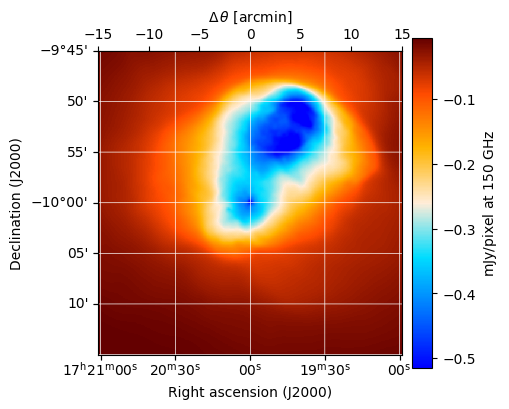

In [1]:
import maria
from maria.io import fetch

input_map = maria.map.load(fetch("maps/cluster2.fits"), nu=150e9)
input_map.data *= 5e1 

input_map[..., 256:-256, 256:-256].plot(cmap="cmb")
print(input_map)

PlanList(1 plans, 900 s):
                           start_time duration target(ra,dec)     center(az,el)
chunk                                                                          
0      2025-11-24 16:33:18.651 +00:00    900 s   (260°, -10°)  (48.41°, 71.36°)


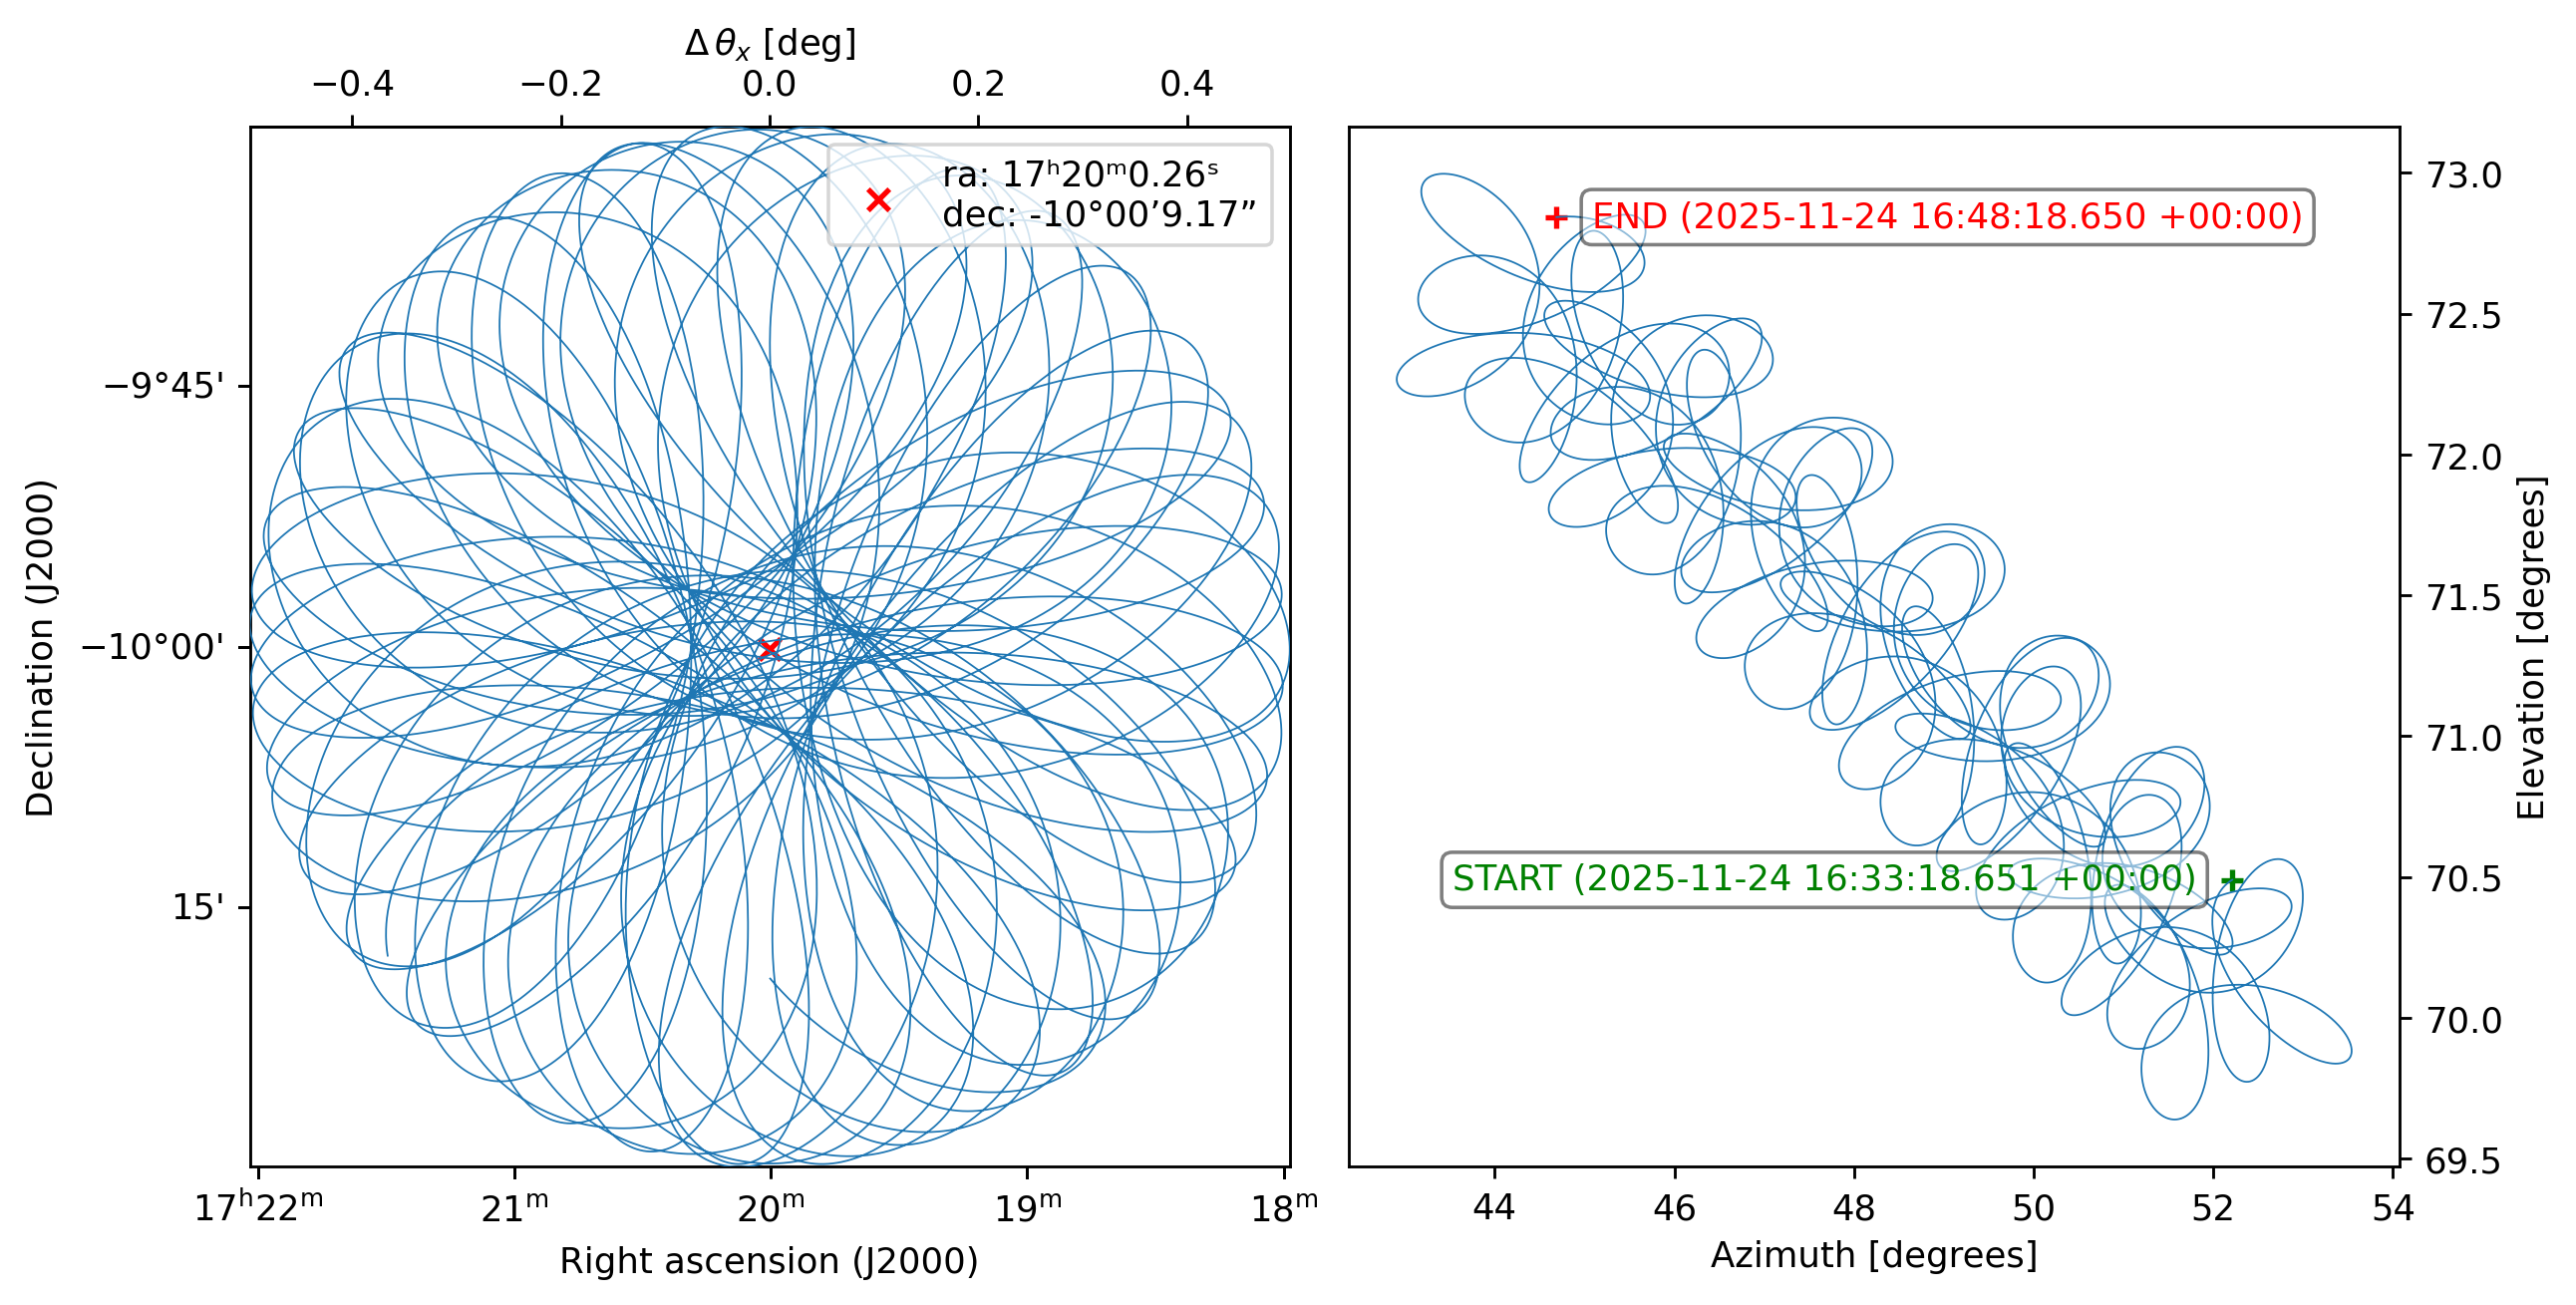

In [2]:
from maria import Planner

planner = Planner(target=input_map, site="cerro_toco", constraints={"el": (70, 90)})
plans = planner.generate_plans(total_duration=900, 
                               max_chunk_duration=900, 
                               sample_rate=50,
                               scan_options={"radius": input_map.width.deg / 2})

plans[0].plot()
print(plans)

Instrument(1 array)
├ arrays:
│            n     FOV baseline   bands polarized
│  array1  756  6.056’      0 m  [f150]     False
│ 
└ bands:
      name   center   width    η         NEP      NET_RJ         NET_CMB   FWHM
   0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  10.5”


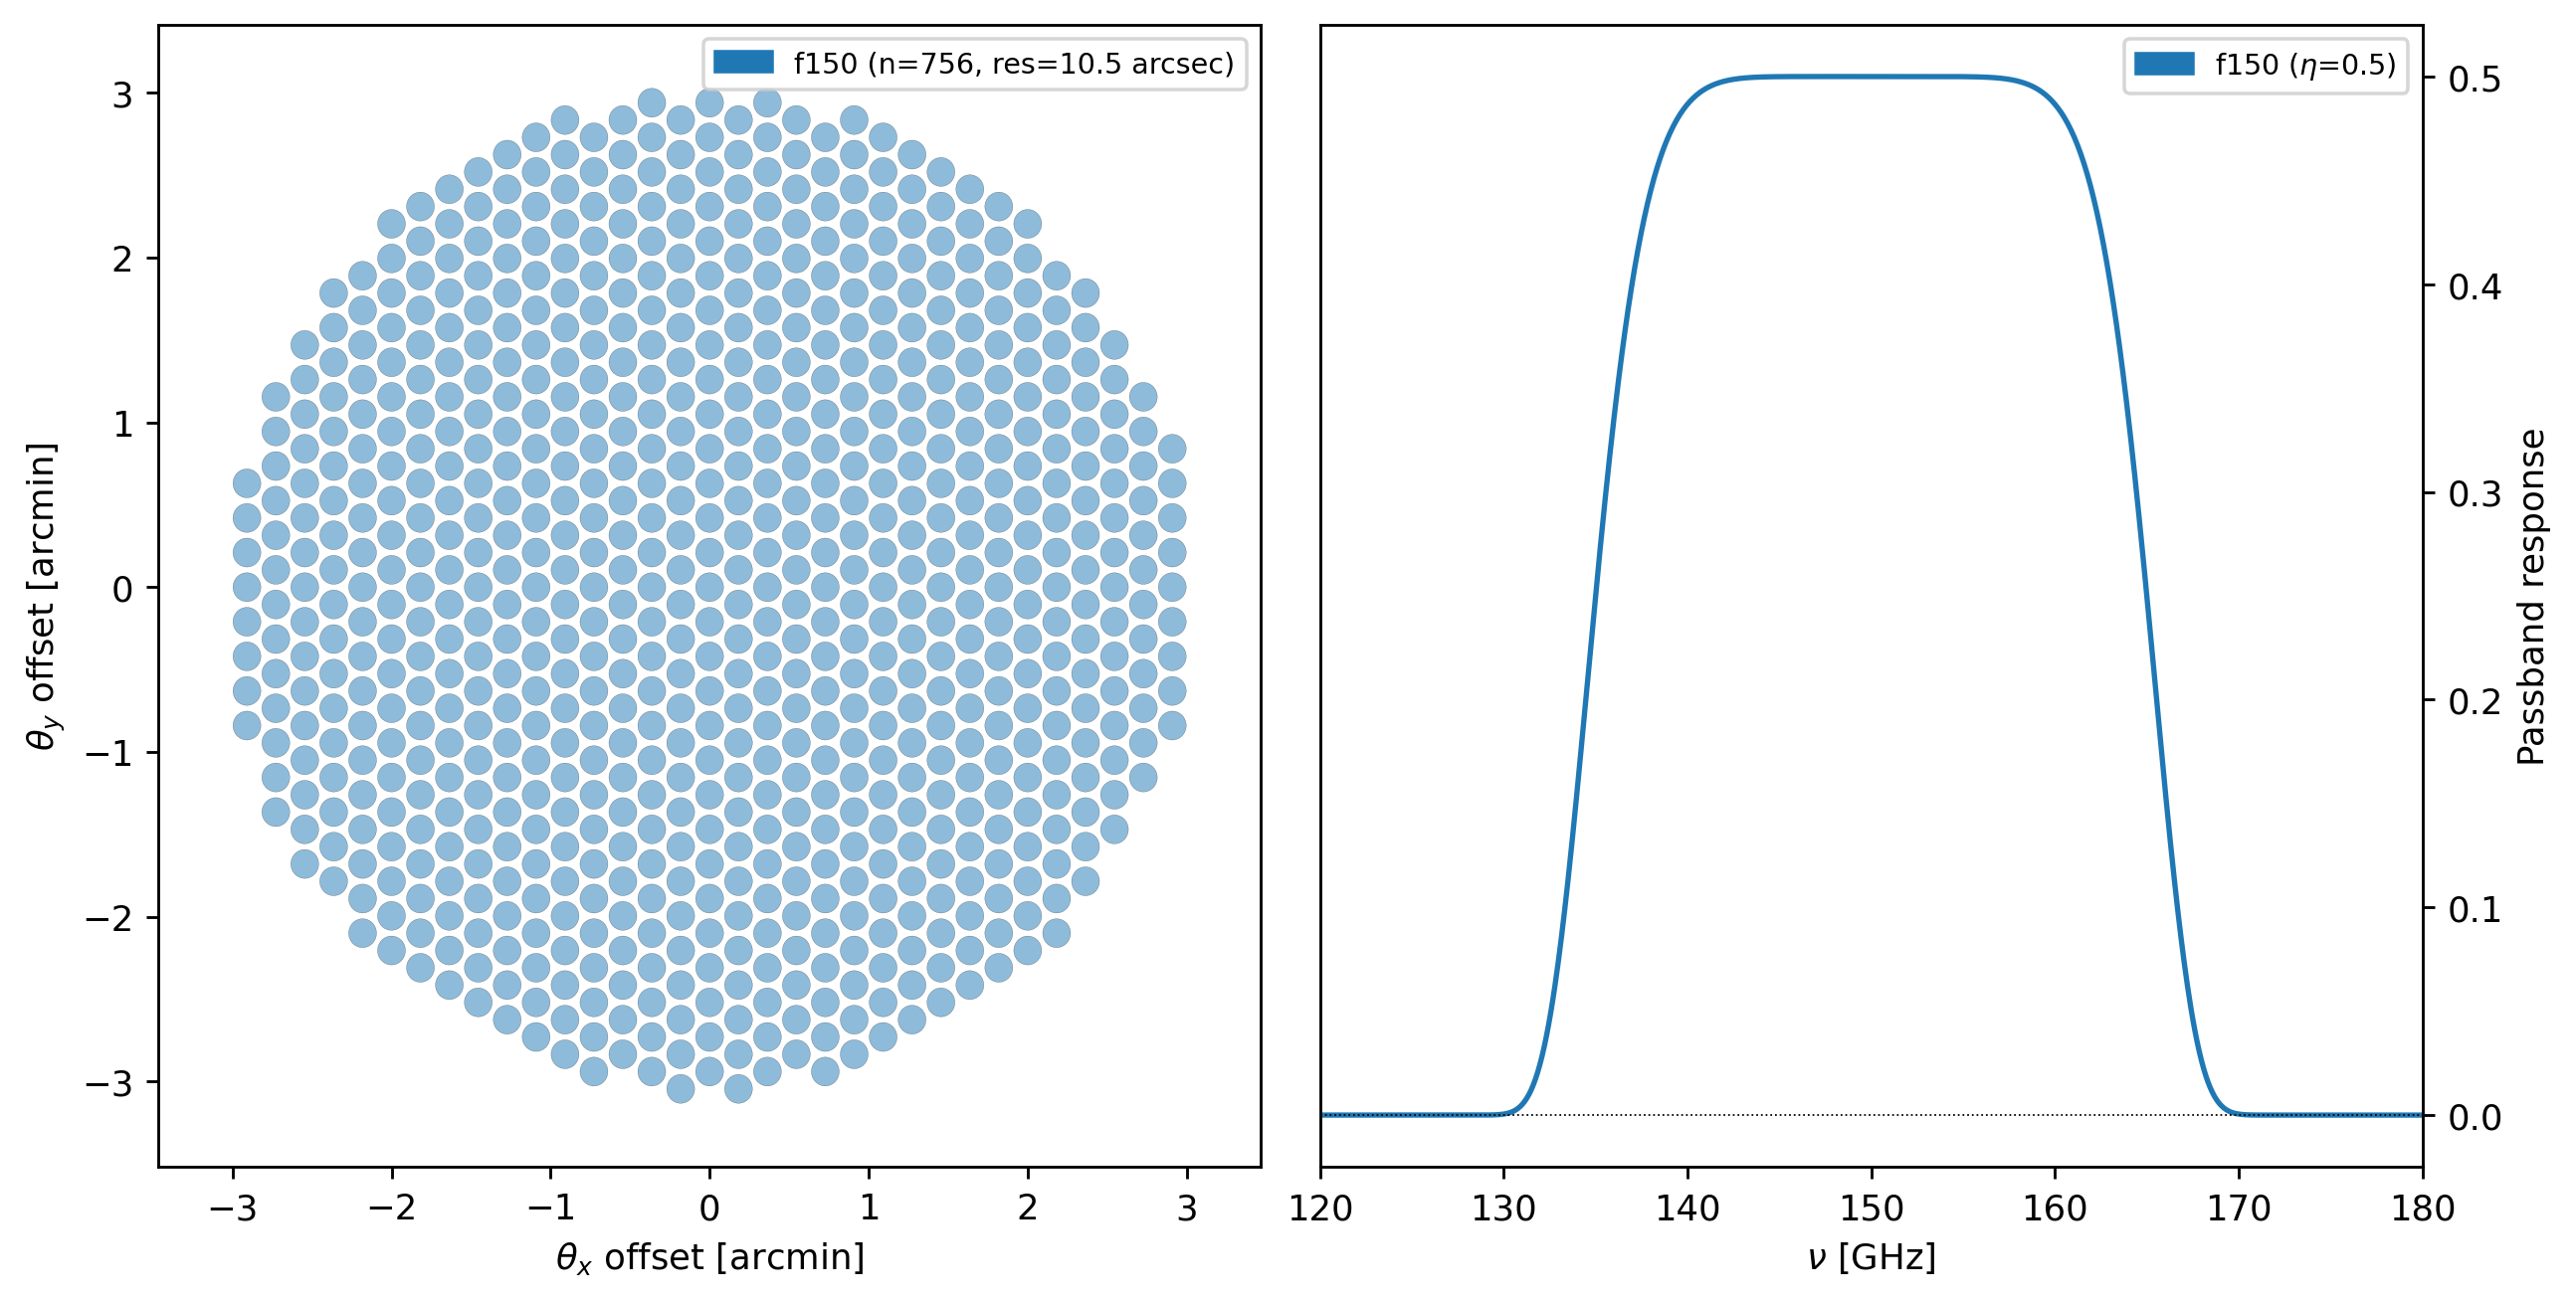

In [3]:
# import maria
from maria.instrument import Band

f150 = Band(
    center=150e9, 
    width=30e9, 
    NET_RJ=30e-6, 
    knee=1e1, 
    gain_error=2e-2)

array = {"field_of_view": 0.1, 
         "beam_spacing": 1.2,
         "primary_size": 50, 
         "shape": "circle",
         "bands": [f150]}

instrument = maria.get_instrument(array=array)

print(instrument)
instrument.plot()

In [4]:
sim = maria.Simulation(
    instrument,
    plans=plans,
    site="cerro_toco",
    map=input_map,
    atmosphere="2d",
    atmosphere_kwargs={"weather": {"pwv": 1.0}},
)

print(sim)

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n     FOV baseline   bands polarized
│ │  array1  756  6.056’      0 m  [f150]     False
│ │ 
│ └ bands:
│       name   center   width    η         NEP      NET_RJ         NET_CMB   FWHM
│    0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  10.5”
├ Site:
│   region: chajnantor
│   timezone: America/Santiago
│   location:
│     longitude: 67°47’16.08” W
│     latitude:  22°57’30.96” S
│     altitude: 5190 m
│   seasonal: True
│   diurnal: True
├ PlanList(1 plans, 900 s):
│                            start_time duration target(ra,dec)     center(az,el)
│ chunk                                                                          
│ 0      2025-11-24 16:33:18.651 +00:00    900 s   (260°, -10°)  (48.41°, 71.36°)
├ '2d'
└ ProjectionMap:
    shape(stokes, nu, t, y, x): (1, 1, 1, 1024, 1024)
    stokes: I
    nu: [150.] GHz
    t: [1.76393382e+09]
    z: naive
    quantity: spectral_flux_density_per_pixel
   

2025-11-23 21:37:12.026 INFO: Simulating observation 1 of 1


Constructing atmosphere:   0%|                | 0/8 [00:00<?, ?it/s]

Constructing atmosphere:  12%|██              | 1/8 [00:00<00:06,  1.06it/s]

Constructing atmosphere:  25%|████            | 2/8 [00:01<00:05,  1.07it/s]

Constructing atmosphere:  38%|██████          | 3/8 [00:02<00:04,  1.07it/s]

Constructing atmosphere:  50%|████████        | 4/8 [00:03<00:03,  1.07it/s]

Constructing atmosphere:  62%|██████████      | 5/8 [00:04<00:02,  1.09it/s]

Constructing atmosphere:  75%|████████████    | 6/8 [00:05<00:01,  1.06it/s]

Constructing atmosphere:  88%|██████████████  | 7/8 [00:06<00:00,  1.06it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:07<00:00,  1.06it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:07<00:00,  1.07it/s]

Generating turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Generating turbulence:  50%|████████        | 4/8 [00:00<00:00, 29.99it/s]

Generating turbulence:  88%|██████████████  | 7/8 [00:00<00:00, 17.39it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 17.11it/s]

Sampling turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Sampling turbulence:  12%|██              | 1/8 [00:01<00:08,  1.27s/it]

Sampling turbulence:  25%|████            | 2/8 [00:01<00:04,  1.24it/s]

Sampling turbulence:  38%|██████          | 3/8 [00:02<00:03,  1.52it/s]

Sampling turbulence:  50%|████████        | 4/8 [00:02<00:02,  1.69it/s]

Sampling turbulence:  62%|██████████      | 5/8 [00:03<00:01,  1.82it/s]

Sampling turbulence:  75%|████████████    | 6/8 [00:03<00:01,  1.88it/s]

Sampling turbulence:  88%|██████████████  | 7/8 [00:04<00:00,  1.94it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  1.98it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  1.71it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.09it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.09it/s, band=f150]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]               

Sampling map: 100%|████████████████| 1/1 [00:15<00:00, 15.96s/it, band=f150]

Sampling map: 100%|████████████████| 1/1 [00:15<00:00, 15.96s/it, band=f150]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:01<00:00,  1.31s/it, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:01<00:00,  1.31s/it, band=f150]

2025-11-23 21:38:03.575 INFO: Simulated observation 1 of 1 in 51.54 s


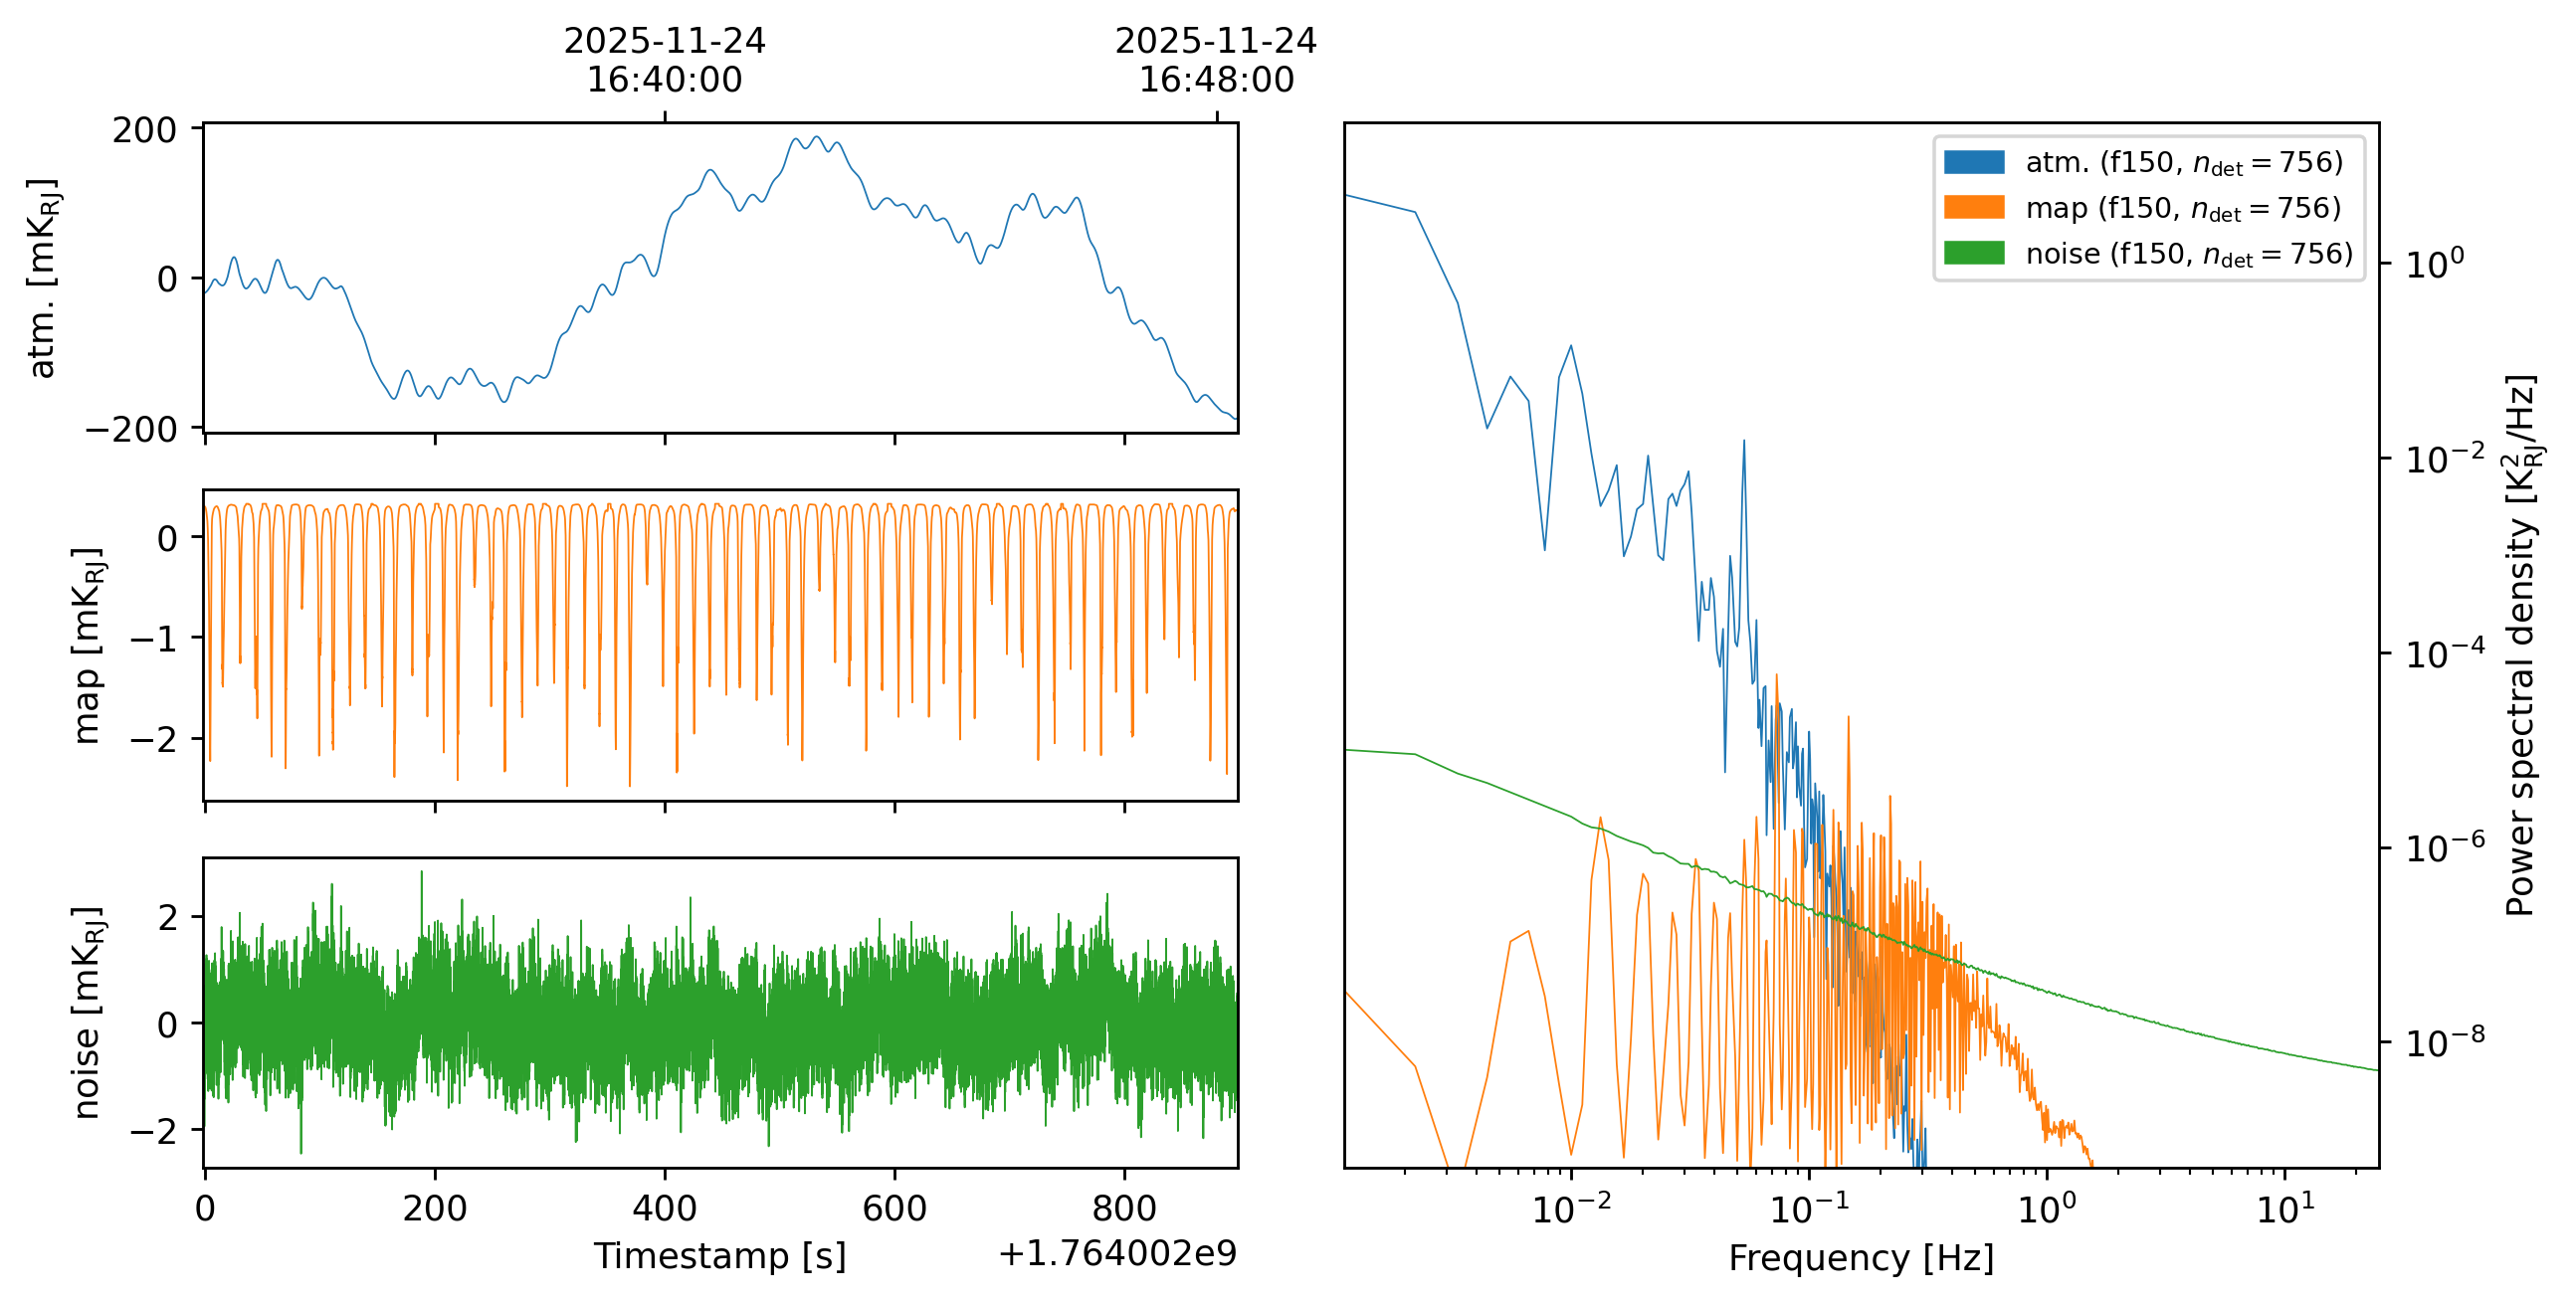

In [5]:
tods = sim.run()
tods[0].plot()

In [6]:
from maria.mappers import MaximumLikelihoodMapper

ml_mapper = MaximumLikelihoodMapper(tods=tods, 
                                    width=0.8*input_map.width.deg,
                                    height=0.8*input_map.height.deg,
                                    units="Jy/pixel")
print(f"{ml_mapper.loss() = }")

2025-11-23 21:38:13.554 INFO: Inferring center {'ra': '17ʰ20ᵐ0.34ˢ', 'dec': '-10°00’7.91”'} for mapper.


2025-11-23 21:38:13.567 INFO: Inferring mapper resolution 0.375’ for mapper from observation patch.


2025-11-23 21:38:13.570 INFO: Inferring mapper stokes parameters 'I' for mapper.


Preprocessing TODs:   0%|                | 0/1 [00:00<?, ?it/s]

Preprocessing TODs: 100%|████████████████| 1/1 [00:01<00:00,  1.39s/it]

Preprocessing TODs: 100%|████████████████| 1/1 [00:01<00:00,  1.39s/it]

Mapping:   0%|          | 0/1 [00:00<?, ?it/s, tod=1/1]

Mapping: 100%|██████████| 1/1 [00:03<00:00,  3.23s/it, tod=1/1]

Mapping: 100%|██████████| 1/1 [00:03<00:00,  3.23s/it, tod=1/1]

Computing noise model:   0%|          | 0/1 [00:00<?, ?it/s]

Computing noise model:   0%|          | 0/1 [00:00<?, ?it/s, tod=1/1]

Computing noise model: 100%|██████████| 1/1 [00:06<00:00,  6.02s/it, tod=1/1]

Computing noise model: 100%|██████████| 1/1 [00:06<00:00,  6.02s/it, tod=1/1]

ml_mapper.loss() = tensor(37309912., grad_fn=<AddBackward0>)


The initial map is a "guess" constructing by heavily filtering the input TODs:

ProjectionMap:
  shape(stokes, nu, t, y, x): (1, 1, 1, 128, 128)
  stokes: I
  nu: [150.] GHz
  t: [1.76400245e+09]
  z: naive
  quantity: spectral_flux_density_per_pixel
  units: Jy/pixel
    min: -5.809e-02
    max: 2.667e-02
    rms: 5.283e-03
  center:
    ra: 17ʰ20ᵐ0.34ˢ
    dec: -10°00’7.91”
  size(y, x): (0.8°, 0.8°)
  resolution(y, x): (0.375’, 0.375’)
  beam(maj, min, rot): [[[10.4977129 10.4977129  0.       ]]]”
  memory: 0.2621 MB


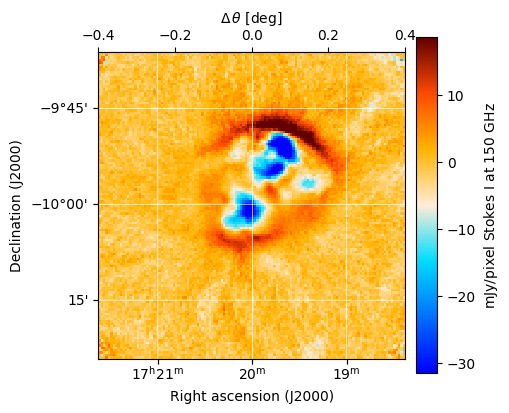

In [7]:
print(ml_mapper.map)
ml_mapper.map.plot(cmap="cmb")


To fit the map we run

In [8]:
ml_mapper.fit(epochs=4, steps_per_epoch=32, lr=1e-1)

epoch 1/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 1/4:   0%|                | 0/32 [00:04<?, ?it/s, loss=3.731e+07]

epoch 1/4:   3%|▌               | 1/32 [00:04<02:28,  4.78s/it, loss=3.731e+07]

epoch 1/4:   3%|▌               | 1/32 [00:09<02:28,  4.78s/it, loss=2.290e+07]

epoch 1/4:   6%|█               | 2/32 [00:09<02:23,  4.77s/it, loss=2.290e+07]

epoch 1/4:   6%|█               | 2/32 [00:14<02:23,  4.77s/it, loss=1.546e+07]

epoch 1/4:   9%|█▌              | 3/32 [00:14<02:18,  4.77s/it, loss=1.546e+07]

epoch 1/4:   9%|█▌              | 3/32 [00:19<02:18,  4.77s/it, loss=1.131e+07]

epoch 1/4:  12%|██              | 4/32 [00:19<02:13,  4.77s/it, loss=1.131e+07]

epoch 1/4:  12%|██              | 4/32 [00:23<02:13,  4.77s/it, loss=8.643e+06]

epoch 1/4:  16%|██▌             | 5/32 [00:23<02:08,  4.77s/it, loss=8.643e+06]

epoch 1/4:  16%|██▌             | 5/32 [00:28<02:08,  4.77s/it, loss=6.749e+06]

epoch 1/4:  19%|███             | 6/32 [00:28<02:04,  4.77s/it, loss=6.749e+06]

epoch 1/4:  19%|███             | 6/32 [00:33<02:04,  4.77s/it, loss=5.338e+06]

epoch 1/4:  22%|███▌            | 7/32 [00:33<01:59,  4.78s/it, loss=5.338e+06]

epoch 1/4:  22%|███▌            | 7/32 [00:38<01:59,  4.78s/it, loss=4.265e+06]

epoch 1/4:  25%|████            | 8/32 [00:38<01:54,  4.78s/it, loss=4.265e+06]

epoch 1/4:  25%|████            | 8/32 [00:42<01:54,  4.78s/it, loss=3.440e+06]

epoch 1/4:  28%|████▌           | 9/32 [00:42<01:50,  4.78s/it, loss=3.440e+06]

epoch 1/4:  28%|████▌           | 9/32 [00:47<01:50,  4.78s/it, loss=2.802e+06]

epoch 1/4:  31%|█████           | 10/32 [00:47<01:45,  4.79s/it, loss=2.802e+06]

epoch 1/4:  31%|█████           | 10/32 [00:52<01:45,  4.79s/it, loss=2.305e+06]

epoch 1/4:  34%|█████▌          | 11/32 [00:52<01:40,  4.79s/it, loss=2.305e+06]

epoch 1/4:  34%|█████▌          | 11/32 [00:57<01:40,  4.79s/it, loss=1.914e+06]

epoch 1/4:  38%|██████          | 12/32 [00:57<01:35,  4.79s/it, loss=1.914e+06]

epoch 1/4:  38%|██████          | 12/32 [01:02<01:35,  4.79s/it, loss=1.605e+06]

epoch 1/4:  41%|██████▌         | 13/32 [01:02<01:31,  4.79s/it, loss=1.605e+06]

epoch 1/4:  41%|██████▌         | 13/32 [01:06<01:31,  4.79s/it, loss=1.359e+06]

epoch 1/4:  44%|███████         | 14/32 [01:06<01:26,  4.80s/it, loss=1.359e+06]

epoch 1/4:  44%|███████         | 14/32 [01:11<01:26,  4.80s/it, loss=1.161e+06]

epoch 1/4:  47%|███████▌        | 15/32 [01:11<01:21,  4.80s/it, loss=1.161e+06]

epoch 1/4:  47%|███████▌        | 15/32 [01:16<01:21,  4.80s/it, loss=1.002e+06]

epoch 1/4:  50%|████████        | 16/32 [01:16<01:16,  4.80s/it, loss=1.002e+06]

epoch 1/4:  50%|████████        | 16/32 [01:21<01:16,  4.80s/it, loss=8.718e+05]

epoch 1/4:  53%|████████▌       | 17/32 [01:21<01:11,  4.80s/it, loss=8.718e+05]

epoch 1/4:  53%|████████▌       | 17/32 [01:26<01:11,  4.80s/it, loss=7.657e+05]

epoch 1/4:  56%|█████████       | 18/32 [01:26<01:07,  4.79s/it, loss=7.657e+05]

epoch 1/4:  56%|█████████       | 18/32 [01:30<01:07,  4.79s/it, loss=6.783e+05]

epoch 1/4:  59%|█████████▌      | 19/32 [01:30<01:02,  4.79s/it, loss=6.783e+05]

epoch 1/4:  59%|█████████▌      | 19/32 [01:35<01:02,  4.79s/it, loss=6.060e+05]

epoch 1/4:  62%|██████████      | 20/32 [01:35<00:57,  4.79s/it, loss=6.060e+05]

epoch 1/4:  62%|██████████      | 20/32 [01:40<00:57,  4.79s/it, loss=5.458e+05]

epoch 1/4:  66%|██████████▌     | 21/32 [01:40<00:52,  4.79s/it, loss=5.458e+05]

epoch 1/4:  66%|██████████▌     | 21/32 [01:45<00:52,  4.79s/it, loss=4.953e+05]

epoch 1/4:  69%|███████████     | 22/32 [01:45<00:47,  4.79s/it, loss=4.953e+05]

epoch 1/4:  69%|███████████     | 22/32 [01:50<00:47,  4.79s/it, loss=4.527e+05]

epoch 1/4:  72%|███████████▌    | 23/32 [01:50<00:43,  4.79s/it, loss=4.527e+05]

epoch 1/4:  72%|███████████▌    | 23/32 [01:54<00:43,  4.79s/it, loss=4.165e+05]

epoch 1/4:  75%|████████████    | 24/32 [01:54<00:38,  4.79s/it, loss=4.165e+05]

epoch 1/4:  75%|████████████    | 24/32 [01:59<00:38,  4.79s/it, loss=3.856e+05]

epoch 1/4:  78%|████████████▌   | 25/32 [01:59<00:33,  4.79s/it, loss=3.856e+05]

epoch 1/4:  78%|████████████▌   | 25/32 [02:04<00:33,  4.79s/it, loss=3.589e+05]

epoch 1/4:  81%|█████████████   | 26/32 [02:04<00:28,  4.78s/it, loss=3.589e+05]

epoch 1/4:  81%|█████████████   | 26/32 [02:09<00:28,  4.78s/it, loss=3.358e+05]

epoch 1/4:  84%|█████████████▌  | 27/32 [02:09<00:23,  4.79s/it, loss=3.358e+05]

epoch 1/4:  84%|█████████████▌  | 27/32 [02:14<00:23,  4.79s/it, loss=3.156e+05]

epoch 1/4:  88%|██████████████  | 28/32 [02:14<00:19,  4.78s/it, loss=3.156e+05]

epoch 1/4:  88%|██████████████  | 28/32 [02:18<00:19,  4.78s/it, loss=2.978e+05]

epoch 1/4:  91%|██████████████▌ | 29/32 [02:18<00:14,  4.79s/it, loss=2.978e+05]

epoch 1/4:  91%|██████████████▌ | 29/32 [02:23<00:14,  4.79s/it, loss=2.820e+05]

epoch 1/4:  94%|███████████████ | 30/32 [02:23<00:09,  4.78s/it, loss=2.820e+05]

epoch 1/4:  94%|███████████████ | 30/32 [02:28<00:09,  4.78s/it, loss=2.680e+05]

epoch 1/4:  97%|███████████████▌| 31/32 [02:28<00:04,  4.78s/it, loss=2.680e+05]

epoch 1/4:  97%|███████████████▌| 31/32 [02:33<00:04,  4.78s/it, loss=2.555e+05]

epoch 1/4: 100%|████████████████| 32/32 [02:33<00:00,  4.79s/it, loss=2.555e+05]

epoch 1/4: 100%|████████████████| 32/32 [02:33<00:00,  4.79s/it, loss=2.555e+05]

epoch 2/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 2/4:   0%|                | 0/32 [00:04<?, ?it/s, loss=2.442e+05]

epoch 2/4:   3%|▌               | 1/32 [00:04<02:28,  4.81s/it, loss=2.442e+05]

epoch 2/4:   3%|▌               | 1/32 [00:09<02:28,  4.81s/it, loss=2.340e+05]

epoch 2/4:   6%|█               | 2/32 [00:09<02:24,  4.82s/it, loss=2.340e+05]

epoch 2/4:   6%|█               | 2/32 [00:14<02:24,  4.82s/it, loss=2.247e+05]

epoch 2/4:   9%|█▌              | 3/32 [00:14<02:19,  4.82s/it, loss=2.247e+05]

epoch 2/4:   9%|█▌              | 3/32 [00:19<02:19,  4.82s/it, loss=2.163e+05]

epoch 2/4:  12%|██              | 4/32 [00:19<02:14,  4.81s/it, loss=2.163e+05]

epoch 2/4:  12%|██              | 4/32 [00:24<02:14,  4.81s/it, loss=2.085e+05]

epoch 2/4:  16%|██▌             | 5/32 [00:24<02:09,  4.81s/it, loss=2.085e+05]

epoch 2/4:  16%|██▌             | 5/32 [00:28<02:09,  4.81s/it, loss=2.015e+05]

epoch 2/4:  19%|███             | 6/32 [00:28<02:04,  4.81s/it, loss=2.015e+05]

epoch 2/4:  19%|███             | 6/32 [00:33<02:04,  4.81s/it, loss=1.949e+05]

epoch 2/4:  22%|███▌            | 7/32 [00:33<02:00,  4.80s/it, loss=1.949e+05]

epoch 2/4:  22%|███▌            | 7/32 [00:38<02:00,  4.80s/it, loss=1.889e+05]

epoch 2/4:  25%|████            | 8/32 [00:38<01:55,  4.80s/it, loss=1.889e+05]

epoch 2/4:  25%|████            | 8/32 [00:43<01:55,  4.80s/it, loss=1.834e+05]

epoch 2/4:  28%|████▌           | 9/32 [00:43<01:50,  4.80s/it, loss=1.834e+05]

epoch 2/4:  28%|████▌           | 9/32 [00:48<01:50,  4.80s/it, loss=1.782e+05]

epoch 2/4:  31%|█████           | 10/32 [00:48<01:45,  4.80s/it, loss=1.782e+05]

epoch 2/4:  31%|█████           | 10/32 [00:52<01:45,  4.80s/it, loss=1.735e+05]

epoch 2/4:  34%|█████▌          | 11/32 [00:52<01:40,  4.80s/it, loss=1.735e+05]

epoch 2/4:  34%|█████▌          | 11/32 [00:57<01:40,  4.80s/it, loss=1.690e+05]

epoch 2/4:  38%|██████          | 12/32 [00:57<01:35,  4.80s/it, loss=1.690e+05]

epoch 2/4:  38%|██████          | 12/32 [01:02<01:35,  4.80s/it, loss=1.648e+05]

epoch 2/4:  41%|██████▌         | 13/32 [01:02<01:31,  4.80s/it, loss=1.648e+05]

epoch 2/4:  41%|██████▌         | 13/32 [01:07<01:31,  4.80s/it, loss=1.609e+05]

epoch 2/4:  44%|███████         | 14/32 [01:07<01:26,  4.79s/it, loss=1.609e+05]

epoch 2/4:  44%|███████         | 14/32 [01:12<01:26,  4.79s/it, loss=1.572e+05]

epoch 2/4:  47%|███████▌        | 15/32 [01:12<01:21,  4.79s/it, loss=1.572e+05]

epoch 2/4:  47%|███████▌        | 15/32 [01:16<01:21,  4.79s/it, loss=1.538e+05]

epoch 2/4:  50%|████████        | 16/32 [01:16<01:16,  4.79s/it, loss=1.538e+05]

epoch 2/4:  50%|████████        | 16/32 [01:21<01:16,  4.79s/it, loss=1.505e+05]

epoch 2/4:  53%|████████▌       | 17/32 [01:21<01:11,  4.79s/it, loss=1.505e+05]

epoch 2/4:  53%|████████▌       | 17/32 [01:26<01:11,  4.79s/it, loss=1.474e+05]

epoch 2/4:  56%|█████████       | 18/32 [01:26<01:07,  4.80s/it, loss=1.474e+05]

epoch 2/4:  56%|█████████       | 18/32 [01:31<01:07,  4.80s/it, loss=1.445e+05]

epoch 2/4:  59%|█████████▌      | 19/32 [01:31<01:02,  4.79s/it, loss=1.445e+05]

epoch 2/4:  59%|█████████▌      | 19/32 [01:35<01:02,  4.79s/it, loss=1.418e+05]

epoch 2/4:  62%|██████████      | 20/32 [01:35<00:57,  4.79s/it, loss=1.418e+05]

epoch 2/4:  62%|██████████      | 20/32 [01:40<00:57,  4.79s/it, loss=1.392e+05]

epoch 2/4:  66%|██████████▌     | 21/32 [01:40<00:52,  4.79s/it, loss=1.392e+05]

epoch 2/4:  66%|██████████▌     | 21/32 [01:45<00:52,  4.79s/it, loss=1.367e+05]

epoch 2/4:  69%|███████████     | 22/32 [01:45<00:47,  4.79s/it, loss=1.367e+05]

epoch 2/4:  69%|███████████     | 22/32 [01:50<00:47,  4.79s/it, loss=1.343e+05]

epoch 2/4:  72%|███████████▌    | 23/32 [01:50<00:43,  4.79s/it, loss=1.343e+05]

epoch 2/4:  72%|███████████▌    | 23/32 [01:55<00:43,  4.79s/it, loss=1.321e+05]

epoch 2/4:  75%|████████████    | 24/32 [01:55<00:38,  4.79s/it, loss=1.321e+05]

epoch 2/4:  75%|████████████    | 24/32 [01:59<00:38,  4.79s/it, loss=1.300e+05]

epoch 2/4:  78%|████████████▌   | 25/32 [01:59<00:33,  4.79s/it, loss=1.300e+05]

epoch 2/4:  78%|████████████▌   | 25/32 [02:04<00:33,  4.79s/it, loss=1.280e+05]

epoch 2/4:  81%|█████████████   | 26/32 [02:04<00:28,  4.79s/it, loss=1.280e+05]

epoch 2/4:  81%|█████████████   | 26/32 [02:09<00:28,  4.79s/it, loss=1.260e+05]

epoch 2/4:  84%|█████████████▌  | 27/32 [02:09<00:23,  4.79s/it, loss=1.260e+05]

epoch 2/4:  84%|█████████████▌  | 27/32 [02:14<00:23,  4.79s/it, loss=1.242e+05]

epoch 2/4:  88%|██████████████  | 28/32 [02:14<00:19,  4.80s/it, loss=1.242e+05]

epoch 2/4:  88%|██████████████  | 28/32 [02:19<00:19,  4.80s/it, loss=1.225e+05]

epoch 2/4:  91%|██████████████▌ | 29/32 [02:19<00:14,  4.80s/it, loss=1.225e+05]

epoch 2/4:  91%|██████████████▌ | 29/32 [02:23<00:14,  4.80s/it, loss=1.208e+05]

epoch 2/4:  94%|███████████████ | 30/32 [02:23<00:09,  4.80s/it, loss=1.208e+05]

epoch 2/4:  94%|███████████████ | 30/32 [02:28<00:09,  4.80s/it, loss=1.192e+05]

epoch 2/4:  97%|███████████████▌| 31/32 [02:28<00:04,  4.81s/it, loss=1.192e+05]

epoch 2/4:  97%|███████████████▌| 31/32 [02:33<00:04,  4.81s/it, loss=1.177e+05]

epoch 2/4: 100%|████████████████| 32/32 [02:33<00:00,  4.81s/it, loss=1.177e+05]

epoch 2/4: 100%|████████████████| 32/32 [02:33<00:00,  4.80s/it, loss=1.177e+05]

epoch 3/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 3/4:   0%|                | 0/32 [00:04<?, ?it/s, loss=1.163e+05]

epoch 3/4:   3%|▌               | 1/32 [00:04<02:28,  4.80s/it, loss=1.163e+05]

epoch 3/4:   3%|▌               | 1/32 [00:09<02:28,  4.80s/it, loss=1.149e+05]

epoch 3/4:   6%|█               | 2/32 [00:09<02:23,  4.80s/it, loss=1.149e+05]

epoch 3/4:   6%|█               | 2/32 [00:14<02:23,  4.80s/it, loss=1.136e+05]

epoch 3/4:   9%|█▌              | 3/32 [00:14<02:19,  4.81s/it, loss=1.136e+05]

epoch 3/4:   9%|█▌              | 3/32 [00:19<02:19,  4.81s/it, loss=1.124e+05]

epoch 3/4:  12%|██              | 4/32 [00:19<02:14,  4.80s/it, loss=1.124e+05]

epoch 3/4:  12%|██              | 4/32 [00:24<02:14,  4.80s/it, loss=1.112e+05]

epoch 3/4:  16%|██▌             | 5/32 [00:24<02:09,  4.80s/it, loss=1.112e+05]

epoch 3/4:  16%|██▌             | 5/32 [00:28<02:09,  4.80s/it, loss=1.100e+05]

epoch 3/4:  19%|███             | 6/32 [00:28<02:04,  4.79s/it, loss=1.100e+05]

epoch 3/4:  19%|███             | 6/32 [00:33<02:04,  4.79s/it, loss=1.089e+05]

epoch 3/4:  22%|███▌            | 7/32 [00:33<01:59,  4.79s/it, loss=1.089e+05]

epoch 3/4:  22%|███▌            | 7/32 [00:38<01:59,  4.79s/it, loss=1.079e+05]

epoch 3/4:  25%|████            | 8/32 [00:38<01:55,  4.79s/it, loss=1.079e+05]

epoch 3/4:  25%|████            | 8/32 [00:43<01:55,  4.79s/it, loss=1.069e+05]

epoch 3/4:  28%|████▌           | 9/32 [00:43<01:50,  4.79s/it, loss=1.069e+05]

epoch 3/4:  28%|████▌           | 9/32 [00:47<01:50,  4.79s/it, loss=1.059e+05]

epoch 3/4:  31%|█████           | 10/32 [00:47<01:45,  4.79s/it, loss=1.059e+05]

epoch 3/4:  31%|█████           | 10/32 [00:52<01:45,  4.79s/it, loss=1.050e+05]

epoch 3/4:  34%|█████▌          | 11/32 [00:52<01:40,  4.79s/it, loss=1.050e+05]

epoch 3/4:  34%|█████▌          | 11/32 [00:57<01:40,  4.79s/it, loss=1.042e+05]

epoch 3/4:  38%|██████          | 12/32 [00:57<01:35,  4.78s/it, loss=1.042e+05]

epoch 3/4:  38%|██████          | 12/32 [01:02<01:35,  4.78s/it, loss=1.033e+05]

epoch 3/4:  41%|██████▌         | 13/32 [01:02<01:30,  4.78s/it, loss=1.033e+05]

epoch 3/4:  41%|██████▌         | 13/32 [01:07<01:30,  4.78s/it, loss=1.025e+05]

epoch 3/4:  44%|███████         | 14/32 [01:07<01:26,  4.78s/it, loss=1.025e+05]

epoch 3/4:  44%|███████         | 14/32 [01:11<01:26,  4.78s/it, loss=1.017e+05]

epoch 3/4:  47%|███████▌        | 15/32 [01:11<01:21,  4.78s/it, loss=1.017e+05]

epoch 3/4:  47%|███████▌        | 15/32 [01:16<01:21,  4.78s/it, loss=1.010e+05]

epoch 3/4:  50%|████████        | 16/32 [01:16<01:16,  4.79s/it, loss=1.010e+05]

epoch 3/4:  50%|████████        | 16/32 [01:21<01:16,  4.79s/it, loss=1.003e+05]

epoch 3/4:  53%|████████▌       | 17/32 [01:21<01:11,  4.79s/it, loss=1.003e+05]

epoch 3/4:  53%|████████▌       | 17/32 [01:26<01:11,  4.79s/it, loss=9.962e+04]

epoch 3/4:  56%|█████████       | 18/32 [01:26<01:07,  4.80s/it, loss=9.962e+04]

epoch 3/4:  56%|█████████       | 18/32 [01:31<01:07,  4.80s/it, loss=9.896e+04]

epoch 3/4:  59%|█████████▌      | 19/32 [01:31<01:02,  4.80s/it, loss=9.896e+04]

epoch 3/4:  59%|█████████▌      | 19/32 [01:35<01:02,  4.80s/it, loss=9.833e+04]

epoch 3/4:  62%|██████████      | 20/32 [01:35<00:57,  4.79s/it, loss=9.833e+04]

epoch 3/4:  62%|██████████      | 20/32 [01:40<00:57,  4.79s/it, loss=9.773e+04]

epoch 3/4:  66%|██████████▌     | 21/32 [01:40<00:52,  4.79s/it, loss=9.773e+04]

epoch 3/4:  66%|██████████▌     | 21/32 [01:45<00:52,  4.79s/it, loss=9.714e+04]

epoch 3/4:  69%|███████████     | 22/32 [01:45<00:47,  4.79s/it, loss=9.714e+04]

epoch 3/4:  69%|███████████     | 22/32 [01:50<00:47,  4.79s/it, loss=9.658e+04]

epoch 3/4:  72%|███████████▌    | 23/32 [01:50<00:43,  4.79s/it, loss=9.658e+04]

epoch 3/4:  72%|███████████▌    | 23/32 [01:55<00:43,  4.79s/it, loss=9.603e+04]

epoch 3/4:  75%|████████████    | 24/32 [01:55<00:38,  4.80s/it, loss=9.603e+04]

epoch 3/4:  75%|████████████    | 24/32 [01:59<00:38,  4.80s/it, loss=9.551e+04]

epoch 3/4:  78%|████████████▌   | 25/32 [01:59<00:33,  4.79s/it, loss=9.551e+04]

epoch 3/4:  78%|████████████▌   | 25/32 [02:04<00:33,  4.79s/it, loss=9.500e+04]

epoch 3/4:  81%|█████████████   | 26/32 [02:04<00:28,  4.80s/it, loss=9.500e+04]

epoch 3/4:  81%|█████████████   | 26/32 [02:09<00:28,  4.80s/it, loss=9.451e+04]

epoch 3/4:  84%|█████████████▌  | 27/32 [02:09<00:23,  4.80s/it, loss=9.451e+04]

epoch 3/4:  84%|█████████████▌  | 27/32 [02:14<00:23,  4.80s/it, loss=9.404e+04]

epoch 3/4:  88%|██████████████  | 28/32 [02:14<00:19,  4.79s/it, loss=9.404e+04]

epoch 3/4:  88%|██████████████  | 28/32 [02:18<00:19,  4.79s/it, loss=9.358e+04]

epoch 3/4:  91%|██████████████▌ | 29/32 [02:18<00:14,  4.79s/it, loss=9.358e+04]

epoch 3/4:  91%|██████████████▌ | 29/32 [02:23<00:14,  4.79s/it, loss=9.314e+04]

epoch 3/4:  94%|███████████████ | 30/32 [02:23<00:09,  4.79s/it, loss=9.314e+04]

epoch 3/4:  94%|███████████████ | 30/32 [02:28<00:09,  4.79s/it, loss=9.271e+04]

epoch 3/4:  97%|███████████████▌| 31/32 [02:28<00:04,  4.79s/it, loss=9.271e+04]

epoch 3/4:  97%|███████████████▌| 31/32 [02:33<00:04,  4.79s/it, loss=9.230e+04]

epoch 3/4: 100%|████████████████| 32/32 [02:33<00:00,  4.79s/it, loss=9.230e+04]

epoch 3/4: 100%|████████████████| 32/32 [02:33<00:00,  4.79s/it, loss=9.230e+04]

epoch 4/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 4/4:   0%|                | 0/32 [00:04<?, ?it/s, loss=9.189e+04]

epoch 4/4:   3%|▌               | 1/32 [00:04<02:28,  4.79s/it, loss=9.189e+04]

epoch 4/4:   3%|▌               | 1/32 [00:09<02:28,  4.79s/it, loss=9.150e+04]

epoch 4/4:   6%|█               | 2/32 [00:09<02:23,  4.78s/it, loss=9.150e+04]

epoch 4/4:   6%|█               | 2/32 [00:14<02:23,  4.78s/it, loss=9.112e+04]

epoch 4/4:   9%|█▌              | 3/32 [00:14<02:18,  4.79s/it, loss=9.112e+04]

epoch 4/4:   9%|█▌              | 3/32 [00:19<02:18,  4.79s/it, loss=9.075e+04]

epoch 4/4:  12%|██              | 4/32 [00:19<02:14,  4.80s/it, loss=9.075e+04]

epoch 4/4:  12%|██              | 4/32 [00:23<02:14,  4.80s/it, loss=9.039e+04]

epoch 4/4:  16%|██▌             | 5/32 [00:23<02:09,  4.80s/it, loss=9.039e+04]

epoch 4/4:  16%|██▌             | 5/32 [00:28<02:09,  4.80s/it, loss=9.004e+04]

epoch 4/4:  19%|███             | 6/32 [00:28<02:04,  4.79s/it, loss=9.004e+04]

epoch 4/4:  19%|███             | 6/32 [00:33<02:04,  4.79s/it, loss=8.969e+04]

epoch 4/4:  22%|███▌            | 7/32 [00:33<01:59,  4.80s/it, loss=8.969e+04]

epoch 4/4:  22%|███▌            | 7/32 [00:38<01:59,  4.80s/it, loss=8.936e+04]

epoch 4/4:  25%|████            | 8/32 [00:38<01:55,  4.80s/it, loss=8.936e+04]

epoch 4/4:  25%|████            | 8/32 [00:43<01:55,  4.80s/it, loss=8.903e+04]

epoch 4/4:  28%|████▌           | 9/32 [00:43<01:50,  4.79s/it, loss=8.903e+04]

epoch 4/4:  28%|████▌           | 9/32 [00:47<01:50,  4.79s/it, loss=8.872e+04]

epoch 4/4:  31%|█████           | 10/32 [00:47<01:45,  4.80s/it, loss=8.872e+04]

epoch 4/4:  31%|█████           | 10/32 [00:52<01:45,  4.80s/it, loss=8.840e+04]

epoch 4/4:  34%|█████▌          | 11/32 [00:52<01:40,  4.80s/it, loss=8.840e+04]

epoch 4/4:  34%|█████▌          | 11/32 [00:57<01:40,  4.80s/it, loss=8.810e+04]

epoch 4/4:  38%|██████          | 12/32 [00:57<01:35,  4.79s/it, loss=8.810e+04]

epoch 4/4:  38%|██████          | 12/32 [01:02<01:35,  4.79s/it, loss=8.780e+04]

epoch 4/4:  41%|██████▌         | 13/32 [01:02<01:31,  4.79s/it, loss=8.780e+04]

epoch 4/4:  41%|██████▌         | 13/32 [01:07<01:31,  4.79s/it, loss=8.751e+04]

epoch 4/4:  44%|███████         | 14/32 [01:07<01:26,  4.78s/it, loss=8.751e+04]

epoch 4/4:  44%|███████         | 14/32 [01:11<01:26,  4.78s/it, loss=8.722e+04]

epoch 4/4:  47%|███████▌        | 15/32 [01:11<01:21,  4.78s/it, loss=8.722e+04]

epoch 4/4:  47%|███████▌        | 15/32 [01:16<01:21,  4.78s/it, loss=8.694e+04]

epoch 4/4:  50%|████████        | 16/32 [01:16<01:16,  4.78s/it, loss=8.694e+04]

epoch 4/4:  50%|████████        | 16/32 [01:21<01:16,  4.78s/it, loss=8.667e+04]

epoch 4/4:  53%|████████▌       | 17/32 [01:21<01:11,  4.79s/it, loss=8.667e+04]

epoch 4/4:  53%|████████▌       | 17/32 [01:26<01:11,  4.79s/it, loss=8.640e+04]

epoch 4/4:  56%|█████████       | 18/32 [01:26<01:07,  4.80s/it, loss=8.640e+04]

epoch 4/4:  56%|█████████       | 18/32 [01:31<01:07,  4.80s/it, loss=8.613e+04]

epoch 4/4:  59%|█████████▌      | 19/32 [01:31<01:02,  4.80s/it, loss=8.613e+04]

epoch 4/4:  59%|█████████▌      | 19/32 [01:35<01:02,  4.80s/it, loss=8.587e+04]

epoch 4/4:  62%|██████████      | 20/32 [01:35<00:57,  4.80s/it, loss=8.587e+04]

epoch 4/4:  62%|██████████      | 20/32 [01:40<00:57,  4.80s/it, loss=8.561e+04]

epoch 4/4:  66%|██████████▌     | 21/32 [01:40<00:52,  4.80s/it, loss=8.561e+04]

epoch 4/4:  66%|██████████▌     | 21/32 [01:45<00:52,  4.80s/it, loss=8.536e+04]

epoch 4/4:  69%|███████████     | 22/32 [01:45<00:48,  4.80s/it, loss=8.536e+04]

epoch 4/4:  69%|███████████     | 22/32 [01:50<00:48,  4.80s/it, loss=8.511e+04]

epoch 4/4:  72%|███████████▌    | 23/32 [01:50<00:43,  4.80s/it, loss=8.511e+04]

epoch 4/4:  72%|███████████▌    | 23/32 [01:55<00:43,  4.80s/it, loss=8.486e+04]

epoch 4/4:  75%|████████████    | 24/32 [01:55<00:38,  4.80s/it, loss=8.486e+04]

epoch 4/4:  75%|████████████    | 24/32 [01:59<00:38,  4.80s/it, loss=8.462e+04]

epoch 4/4:  78%|████████████▌   | 25/32 [01:59<00:33,  4.80s/it, loss=8.462e+04]

epoch 4/4:  78%|████████████▌   | 25/32 [02:04<00:33,  4.80s/it, loss=8.438e+04]

epoch 4/4:  81%|█████████████   | 26/32 [02:04<00:28,  4.79s/it, loss=8.438e+04]

epoch 4/4:  81%|█████████████   | 26/32 [02:09<00:28,  4.79s/it, loss=8.414e+04]

epoch 4/4:  84%|█████████████▌  | 27/32 [02:09<00:23,  4.79s/it, loss=8.414e+04]

epoch 4/4:  84%|█████████████▌  | 27/32 [02:14<00:23,  4.79s/it, loss=8.391e+04]

epoch 4/4:  88%|██████████████  | 28/32 [02:14<00:19,  4.80s/it, loss=8.391e+04]

epoch 4/4:  88%|██████████████  | 28/32 [02:19<00:19,  4.80s/it, loss=8.368e+04]

epoch 4/4:  91%|██████████████▌ | 29/32 [02:19<00:14,  4.80s/it, loss=8.368e+04]

epoch 4/4:  91%|██████████████▌ | 29/32 [02:23<00:14,  4.80s/it, loss=8.345e+04]

epoch 4/4:  94%|███████████████ | 30/32 [02:23<00:09,  4.79s/it, loss=8.345e+04]

epoch 4/4:  94%|███████████████ | 30/32 [02:28<00:09,  4.79s/it, loss=8.323e+04]

epoch 4/4:  97%|███████████████▌| 31/32 [02:28<00:04,  4.79s/it, loss=8.323e+04]

epoch 4/4:  97%|███████████████▌| 31/32 [02:33<00:04,  4.79s/it, loss=8.301e+04]

epoch 4/4: 100%|████████████████| 32/32 [02:33<00:00,  4.79s/it, loss=8.301e+04]

epoch 4/4: 100%|████████████████| 32/32 [02:33<00:00,  4.79s/it, loss=8.301e+04]

which gives us an improved map

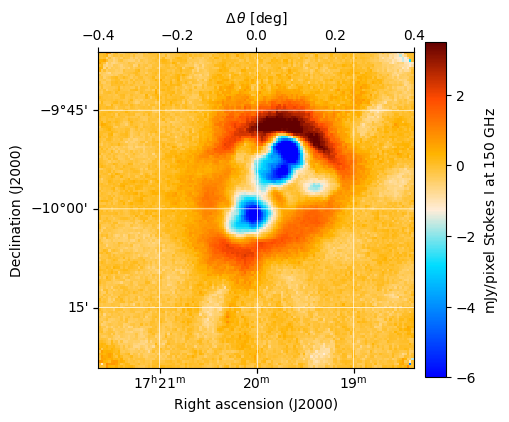

In [9]:
ml_mapper.map.plot(cmap="cmb")

that will improve more as it continues to fit.